In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os 
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
print(data.keys())

In [ ]:
df=pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [8]:
def checking_api():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'D:\Projects\Data Analysis\Portfolio Projects\Python\Web_Scraping\Crypto_Site_API_Scraper\api_data.csv'):
        df.to_csv(r'D:\Projects\Data Analysis\Portfolio Projects\Python\Web_Scraping\Crypto_Site_API_Scraper\api_data.csv',header='column_names')
    else:
        df.to_csv(r'D:\Projects\Data Analysis\Portfolio Projects\Python\Web_Scraping\Crypto_Site_API_Scraper\api_data.csv',mode='a',header=False)
        

In [ ]:
for i in range(2): # max 333 runs per day
    checking_api()
    print('API Runner completed')
    sleep(5)

In [48]:
pd.read_csv(r'D:\Projects\Data Analysis\Portfolio Projects\Python\Web_Scraping\Crypto_Site_API_Scraper\api_data.csv')

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,...,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10824,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19638131.00000,19638131.00000,False,NaN,1,NaN,NaN,NaN,2024-02-26T08:52:00.000Z,...,-10.42320,-0.14176,-0.73167,-1.65169,23.00342,19.13110,38.75844,1006926387791.36621,50.54320,1076754918460.34998,NaN,2024-02-26T08:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 08:54:23.394452
1,1,1027,Ethereum,ETH,ethereum,8451,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120155437.51590,120155437.51590,True,NaN,2,NaN,NaN,NaN,2024-02-26T08:52:00.000Z,...,6.29120,0.18312,2.38801,6.49179,36.97383,29.56102,54.26646,371900249575.79761,18.66730,371900249575.79999,NaN,2024-02-26T08:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 08:54:23.394452
2,2,825,Tether USDt,USDT,tether,75347,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,97910734641.72714,101600078701.91405,True,NaN,3,NaN,NaN,NaN,2024-02-26T08:51:00.000Z,...,9.62220,0.00290,0.01321,-0.00671,0.02145,-0.03049,-0.00013,97926525044.54608,4.91290,101616464098.00999,NaN,2024-02-26T08:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-26 08:54:23.394452
3,3,1839,BNB,BNB,bnb,2071,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149543075.41723,149543075.41723,False,NaN,4,NaN,NaN,NaN,2024-02-26T08:51:00.000Z,...,37.09170,0.48351,2.13072,10.59266,28.03892,18.31788,71.87244,58083462571.01917,2.91400,58083462571.02000,NaN,2024-02-26T08:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 08:54:23.394452
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,441080633.93824,570374064.59386,True,NaN,5,NaN,NaN,NaN,2024-02-26T08:52:00.000Z,...,-1.75140,0.27565,1.07802,-7.24158,13.52847,-1.73318,88.77502,45760029120.51780,2.29690,59173610893.69000,NaN,2024-02-26T08:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 08:54:23.394452
5,5,52,XRP,XRP,xrp,1230,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54594247369.00000,99987873963.00000,False,NaN,6,NaN,NaN,NaN,2024-02-26T08:52:00.000Z,...,4.35910,0.37100,-1.32432,-3.48858,1.93446,-15.56825,-10.09905,29433904749.75191,1.47740,53913930804.48000,NaN,2024-02-26T08:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 08:54:23.394452
6,6,3408,USDC,USDC,usd-coin,16864,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28187639078.32354,28187639078.32354,False,NaN,7,NaN,NaN,NaN,2024-02-26T08:52:00.000Z,...,14.48880,-0.00737,-0.03055,-0.00278,-0.02071,-0.00095,-0.00871,28186893411.12849,1.41470,28186893411.13000,NaN,2024-02-26T08:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-26 08:54:23.394452
7,7,2010,Cardano,ADA,cardano,1076,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35470255287.13200,36656916043.87500,False,NaN,8,NaN,NaN,NaN,2024-02-26T08:51:00.000Z,...,0.21780,-0.18019,-1.16479,-7.27785,22.00846,-10.83336,57.06635,20724831610.07147,1.03970,26292943620.05000,NaN,2024-02-26T08:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 08:54:23.394452
8,8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",720000000.00000,377178142.67732,43586

In [49]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10824,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19638131.00000,19638131.00000,False,NaN,1,NaN,NaN,NaN,2024-02-26T09:33:00.000Z,51064.80702,14960406945.96345,-7.94850,-0.53903,-1.01491,-2.29488,22.71038,18.73397,37.84814,1002817369758.99829,50.65260,1072360947431.25000,NaN,2024-02-26T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 09:33:53.790984
1,1027,Ethereum,ETH,ethereum,8451,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120155437.51590,120155437.51590,True,NaN,2,NaN,NaN,NaN,2024-02-26T09:33:00.000Z,3056.74477,13810498209.74420,9.75490,-1.40706,1.29374,4.98918,35.05802,27.83740,51.80136,367284504796.44934,18.54860,367284504796.45001,NaN,2024-02-26T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 09:33:53.790984
2,825,Tether USDt,USDT,tether,75348,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97910734641.72714,101600078701.91405,True,NaN,3,NaN,NaN,NaN,2024-02-26T09:32:00.000Z,1.00006,38473404830.49836,12.29280,-0.00726,0.00216,0.01137,0.02114,-0.04792,0.00779,97916291146.01514,4.94500,101605844579.12000,NaN,2024-02-26T09:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-26 09:33:53.790984
3,1839,BNB,BNB,bnb,2071,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149543075.41723,149543075.41723,False,NaN,4,NaN,NaN,NaN,2024-02-26T09:32:00.000Z,386.68113,1454026617.49530,38.99930,-0.61101,2.09036,9.85724,27.37486,17.17768,70.56063,57825485247.58965,2.92030,57825485247.59000,NaN,2024-02-26T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 09:33:53.790984
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,441080633.93824,570374064.59386,True,NaN,5,NaN,NaN,NaN,2024-02-26T09:33:00.000Z,102.22292,995724307.97255,4.42440,-1.54606,-0.13382,-8.90136,11.77452,-1.31494,85.52229,45088548508.06348,2.27710,58305299984.63000,NaN,2024-02-26T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 09:33:53.790984
5,52,XRP,XRP,xrp,1230,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54594247369.00000,99987873963.00000,False,NaN,6,NaN,NaN,NaN,2024-02-26T09:33:00.000Z,0.53534,764951844.00853,6.42700,-0.60367,-1.87217,-4.73164,1.43574,-16.63118,-11.09372,29226434279.98386,1.47600,53533908220.12000,NaN,2024-02-26T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 09:33:53.790984
6,3408,USDC,USDC,usd-coin,16864,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28187639078.32354,28187639078.32354,False,NaN,7,NaN,NaN,NaN,2024-02-26T09:33:00.000Z,0.99998,3719545501.29559,16.39250,-0.00224,-0.00726,-0.00160,-0.01685,-0.01319,0.00059,28187104501.52078,1.42310,28187104501.52000,NaN,2024-02-26T09:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-26 09:33:53.790984
7,2010,Cardano,ADA,cardano,1076,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35470255287.13200,36656916043.87500,False,NaN,8,NaN,NaN,NaN,2024-02-26T09:32:00.000Z,0.57992,363500412.54761,3.69030,-0.93984,-1.52306,-8.68817,21.35275,-10.30477,55.79880,20569851116.88133,1.03880,26096324730.86000,NaN,2024-02-26T09:32:00.000Z,NaN,NaN,NaN,N

In [50]:
pd.set_option('display.float_format',lambda x:'%.5f' %x)

In [51]:
pd.set_option('display.max.columns',37)

In [52]:
pd.set_option('display.max.rows',120)

In [53]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.53903,-1.01491,-2.29488,22.71038,18.73397,37.84814
Ethereum,-1.40706,1.29374,4.98918,35.05802,27.83740,51.80136
Tether USDt,-0.00726,0.00216,0.01137,0.02114,-0.04792,0.00779
BNB,-0.61101,2.09036,9.85724,27.37486,17.17768,70.56063
Solana,-1.54606,-0.13382,-8.90136,11.77452,-1.31494,85.52229
XRP,-0.60367,-1.87217,-4.73164,1.43574,-16.63118,-11.09372
USDC,-0.00224,-0.00726,-0.00160,-0.01685,-0.01319,0.00059
Cardano,-0.93984,-1.52306,-8.68817,21.35275,-10.30477,55.79880
Avalanche,-0.91276,-0.14365,-8.65411,14.23113,-12.16338,85.01880


In [54]:
df4=df3.stack()
df4

name                                           
Bitcoin            quote.USD.percent_change_1h     -0.53903
                   quote.USD.percent_change_24h    -1.01491
                   quote.USD.percent_change_7d     -2.29488
                   quote.USD.percent_change_30d    22.71038
                   quote.USD.percent_change_60d    18.73397
                   quote.USD.percent_change_90d    37.84814
Ethereum           quote.USD.percent_change_1h     -1.40706
                   quote.USD.percent_change_24h     1.29374
                   quote.USD.percent_change_7d      4.98918
                   quote.USD.percent_change_30d    35.05802
                   quote.USD.percent_change_60d    27.83740
                   quote.USD.percent_change_90d    51.80136
Tether USDt        quote.USD.percent_change_1h     -0.00726
                   quote.USD.percent_change_24h     0.00216
                   quote.USD.percent_change_7d      0.01137
                   quote.USD.percent_change_30d     

In [55]:
type(df4)

pandas.core.series.Series

In [56]:
df4.count()

120

In [57]:
df5=df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.53903
                  quote.USD.percent_change_24h  -1.01491
                  quote.USD.percent_change_7d   -2.29488
                  quote.USD.percent_change_30d  22.71038
                  quote.USD.percent_change_60d  18.73397
                  quote.USD.percent_change_90d  37.84814
Ethereum          quote.USD.percent_change_1h   -1.40706
                  quote.USD.percent_change_24h   1.29374
                  quote.USD.percent_change_7d    4.98918
                  quote.USD.percent_change_30d  35.05802
                  quote.USD.percent_change_60d  27.83740
                  quote.USD.percent_change_90d  51.80136
Tether USDt       quote.USD.percent_change_1h   -0.00726
                  quote.USD.percent_change_24h   0.00216
                  quote.USD.percent_change_7d    0.01137
                  quote.USD.percent_change_30d   0.02114
                  quote.USD.percent_change_60d  -0.04792
                  quote.USD.percent_change_90d   0.00779
BNB               quote.USD.percent_change_1h   -0.61101
                  quote.USD.percent_change_24h   2.09036
                  quote.USD.percent_change_7d    9.85724
                  quote.USD.percent_change_30d  27.37486
                  quote.USD.percent_change_60d  17.17768
                  quote.USD.percent_change_90d  70.56063
Solana            quote.USD.percent_change_1h   -1.54606
                  quote.USD.percent_change_24h  -0.13382
                  quote.USD.percent_change_7d   -8.90136
                  quote.USD.percent_change_30d  11.77452
                  quote.USD.percent_change_60d  -1.31494
                  quote.USD.percent_change_90d  85.52229
XRP               quote.USD.percent_change_1h   -0.60367
                  quote.USD.percent_change_24h  -1.87217
                  quote.USD.percent_change_7d   -4.73164
                  quote.USD.percent_change_30d   1.43574
                  quote.USD.percent_change_60d -16.63118
                  quote.USD.percent_change_90d -11.09372
USDC              quote.USD.percent_change_1h   -0.00224
                  quote.USD.percent_change_24h  -0.00726
                  quote.USD.percent_change_7d   -0.00160
                  quote.USD.percent_change_30d  -0.01685
                  quote.USD.percent_change_60d  -0.01319
                  quote.USD.percent_change_90d   0.00059
Cardano           quote.USD.percent_change_1h   -0.93984
                  quote.USD.percent_change_24h  -1.52306
                  quote.USD.percent_change_7d   -8.68817
                  quote.USD.percent_change_30d  21.35275
                  quote.USD.percent_change_60d -10.30477
                  quote.USD.percent_change_90d  55.79880
Avalanche         quote.USD.percent_change_1h   -0.91276
                  quote.USD.percent_change_24h  -0.14365
                  quote.USD.percent_change_7d   -8.65411
                  quote.USD.percent_change_30d  14.23113
                  quote.USD.percent_change_60d -12.16338
                  quote.USD.percent_change_90d  85.01880
Dogecoin          quote.USD.percent_change_1h   -1.13102
                  quote.USD.percent_change_24h  -1.64943
                  quote.USD.percent_change_7d   -1.88928
                  quote.USD.percent_change_30d   6.53282
                  quote.USD.percent_change_60d  -9.29417
                  quote.USD.percent_change_90d   9.65100
TRON              quote.USD.percent_change_1h   -0.12283
                  quote.USD.percent_change_24h   0.13052
                  quote.USD.percent_change_7d    1.68606
                  quote.USD.percent_change_30d  20.01946
                  quote.USD.percent_change_60d  30.27004
                  quote.USD.percent_change_90d  35.50968
Chainlink         quote.USD.percent_change_1h   -1.26623
                  quote.USD.percent_change_24h  -0.55160
                  quote.USD.percent_change_7d   -8.71459
   

In [58]:
df5.count()

values    120
dtype: int64

In [59]:
idx=pd.Index(range(120))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.53903
1,Bitcoin,quote.USD.percent_change_24h,-1.01491
2,Bitcoin,quote.USD.percent_change_7d,-2.29488
3,Bitcoin,quote.USD.percent_change_30d,22.71038
4,Bitcoin,quote.USD.percent_change_60d,18.73397
5,Bitcoin,quote.USD.percent_change_90d,37.84814
6,Ethereum,quote.USD.percent_change_1h,-1.40706
7,Ethereum,quote.USD.percent_change_24h,1.29374
8,Ethereum,quote.USD.percent_change_7d,4.98918
9,Ethereum,quote.USD.percent_change_30d,35.05802


In [60]:
df7=df6.rename(columns={'level_1':'percentage change'})
df7

,name,percentage change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.53903
1,Bitcoin,quote.USD.percent_change_24h,-1.01491
2,Bitcoin,quote.USD.percent_change_7d,-2.29488
3,Bitcoin,quote.USD.percent_change_30d,22.71038
4,Bitcoin,quote.USD.percent_change_60d,18.73397
5,Bitcoin,quote.USD.percent_change_90d,37.84814
6,Ethereum,quote.USD.percent_change_1h,-1.40706
7,Ethereum,quote.USD.percent_change_24h,1.29374
8,Ethereum,quote.USD.percent_change_7d,4.98918
9,Ethereum,quote.USD.percent_change_30d,35.05802


In [61]:
df7['percentage change']=df7['percentage change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percentage change']=df7['percentage change'].replace(['quote.USD.percent_change_24h'],['24h'])
df7['percentage change']=df7['percentage change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percentage change']=df7['percentage change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percentage change']=df7['percentage change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percentage change']=df7['percentage change'].replace(['quote.USD.percent_change_90d'],['90d'])

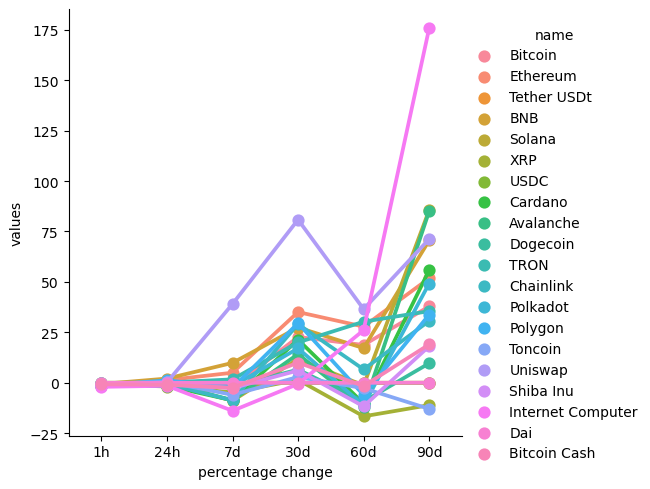

In [62]:
sns.catplot(x='percentage change',y='values',hue='name',data=df7,kind='point')

In [ ]:
df10=df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)